<a href="https://colab.research.google.com/github/valid999/Tensorflow_Projects_with_Deep_Learning/blob/main/MNIST_DATA_with_only_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [3]:
print(tf.__version__)

2.13.0


In [5]:
(X_train , Y_train) , (X_test , Y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


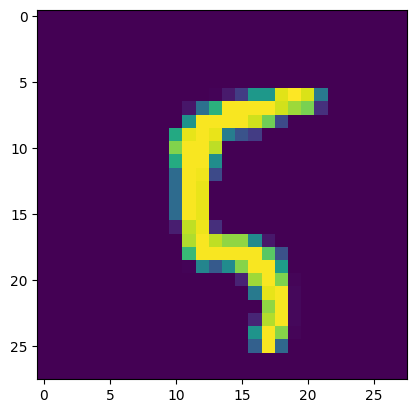

label: 5


In [6]:
plt.imshow(X_train[100])
plt.show()


print('label:' , Y_train[100])

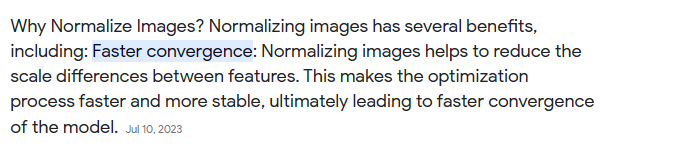

In [7]:
X_train  = X_train/255
X_test = X_test / 255

In [9]:
class DNN(tf.keras.Model):
  def __init__(self  , sizes):
    super(DNN ,  self).__init__()
    self.hidden_1 = sizes[0]
    self.hidden_2 = sizes[1]
    self.output_layer_size = sizes[2]


    self.input_layer = tf.keras.layers.Flatten(input_shape=(28,28))
    self.hidden_layer1 = tf.keras.layers.Dense(self.hidden_1 , activation = 'sigmoid')
    self.hidden_layer2 = tf.keras.layers.Dense(self.hidden_2 , activation = 'sigmoid')
    self.hidden_layer = tf.keras.layers.Dense(self.output_layer_size , activation = 'softmax')

  def call(self , x_train):  # Forward pass
    x = self.input_layer(x_train)
    x = self.hidden_layer1(x)
    x = self.hidden_layer2(x)
    x = self.hidden_layer(x)
    return x


In [10]:
model = DNN(sizes = [128 , 64 , 10])

In [15]:
# model.summary()

In [16]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [19]:
model.fit(X_train , Y_train , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4766 - accuracy: 0.8778
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1813 - accuracy: 0.9468
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1260 - accuracy: 0.9624
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0935 - accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0725 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0573 - accuracy: 0.9833
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0470 - accuracy: 0.9865
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0368 - accuracy: 0.9896
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0293 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - 

In [20]:
loss , accuracy = model.evaluate(X_test , Y_test)
print('Accuracy:' , accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0726 - accuracy: 0.9784
Accuracy: 0.9783999919891357


In [21]:
Y_pred = model.predict(X_test)
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

313/313 [==============================] - 1s 3ms/step
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1,

In [22]:
print(Y_test)

[7 2 1 ... 4 5 6]


In [24]:
conf_mat = tf.math.confusion_matrix(Y_test , Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 972    0    1    1    0    1    1    1    2    1]
 [   0 1119    4    1    0    1    3    2    5    0]
 [   4    0 1013    0    2    0    2    5    6    0]
 [   1    0    5  983    2    4    0    6    5    4]
 [   2    0    0    0  967    0    6    0    0    7]
 [   4    0    0    5    2  865    5    1    7    3]
 [   8    3    0    1    6    4  935    0    1    0]
 [   1    0   12    3    3    0    0 1002    2    5]
 [   9    0    2    2    7    3    3    2  942    4]
 [   2    2    0    2   13    2    0    2    0  986]], shape=(10, 10), dtype=int32)


In [25]:
model.save_weights('/content/sample_data/dense_model.h5')

In [26]:
del model

In [27]:
model = DNN(sizes = [128 , 64 , 10])
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [32]:
loss, accuracy = model.evaluate(X_test , Y_test)
print("Accuracy: " , accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.0726 - accuracy: 0.9784
Accuracy:  0.9783999919891357


In [31]:
model.load_weights('/content/sample_data/dense_model.h5')